In [1]:
!pip install --upgrade pip
!pip install ipywidgets
!pip install ipython

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

np.random.seed(52)

In [3]:
df = pd.read_csv("cirrhosis.csv")

In [4]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [7]:
df.dtypes.value_counts()

float64    10
object      7
int64       3
Name: count, dtype: int64

In [8]:
pd.DataFrame(df.isnull().sum(), 
            columns = ['missing_count']) \
.assign(missing_pct = lambda x: x['missing_count']/df.shape[0]*100).astype(float).round(1)

,missing_count,missing_pct
ID,0.0,0.0
N_Days,0.0,0.0
Status,0.0,0.0
Drug,106.0,25.4
Age,0.0,0.0
Sex,0.0,0.0
Ascites,106.0,25.4
Hepatomegaly,106.0,25.4
Spiders,106.0,25.4
Edema,0.0,0.0


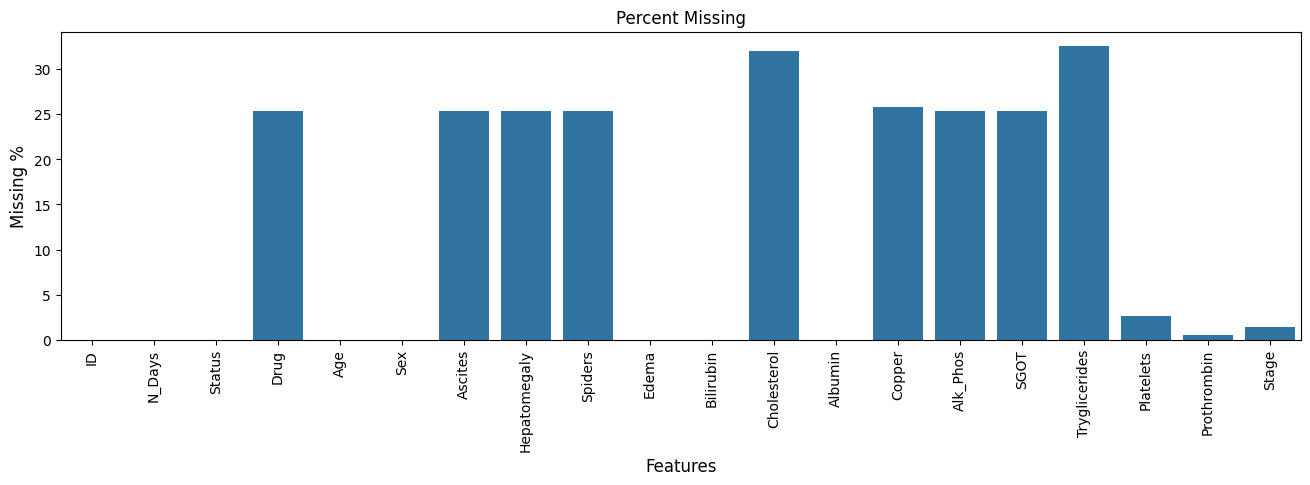

In [9]:
nan_df = ((df.isna().sum() / df.shape[0]*100)).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(16,4))
sns.barplot(x=nan_df['feature'], y=nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing %', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [10]:
df.Drug.unique()

array(['D-penicillamine', 'Placebo', nan], dtype=object)

In [11]:
nan_drug = df[pd.isnull(df.Drug)]
nan_drug

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,313,4062,C,NaN,21915,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
313,314,3561,D,NaN,23741,F,NaN,NaN,NaN,S,1.4,NaN,3.04,NaN,NaN,NaN,NaN,331.0,12.1,4.0
314,315,2844,C,NaN,19724,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0
315,316,2071,D,NaN,27394,F,NaN,NaN,NaN,S,0.7,NaN,3.96,NaN,NaN,NaN,NaN,NaN,11.3,4.0
316,317,3030,C,NaN,22646,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [12]:
pd.DataFrame(nan_drug.isnull().sum(), 
            columns = ['missing_count']) \
.assign(missing_pct = lambda x: x['missing_count']/nan_drug.shape[0]*100).astype(float).round(1)

,missing_count,missing_pct
ID,0.0,0.0
N_Days,0.0,0.0
Status,0.0,0.0
Drug,106.0,100.0
Age,0.0,0.0
Sex,0.0,0.0
Ascites,106.0,100.0
Hepatomegaly,106.0,100.0
Spiders,106.0,100.0
Edema,0.0,0.0


In [13]:
df = df.dropna(subset='Drug')
df = df.drop('ID', axis=1)
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [14]:
#  поменять потом на более красивое решение с DRY
# меняем dtype всех фич из object в int64, кроме Status, который является таргетом
df['Sex'] = df['Sex'].apply(lambda x:1 if x=='M' else 0)
df['Ascites'] = df['Ascites'].apply(lambda x:1 if x=='Y' else 0)
df['Hepatomegaly'] = df['Hepatomegaly'].apply(lambda x:1 if x=='Y' else 0)
df['Spiders'] = df['Spiders'].apply(lambda x:1 if x=='Y' else 0)
df['Edema'] = df['Edema'].apply(lambda x:2 if x=='Y' else (1 if x == 'S' else 0))
df['Drug'] = df['Drug'].apply(lambda x:1 if x=='D-penicillamine' else 0)
df.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,1,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,1,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,1,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,1,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,0,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


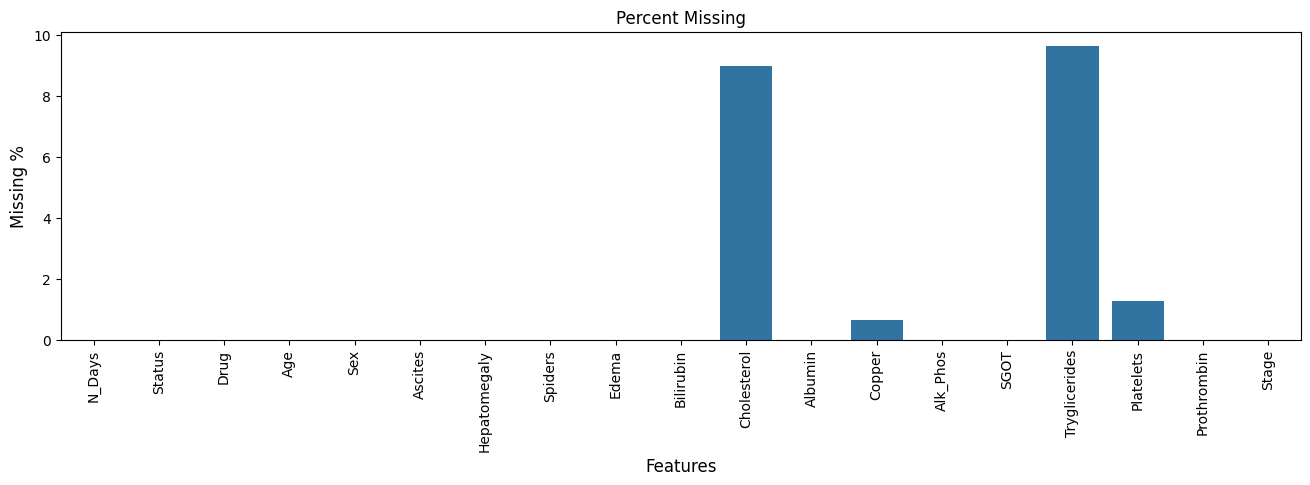

In [15]:
nan_df = ((df.isna().sum() / df.shape[0]*100)).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(16,4))
sns.barplot(x=nan_df['feature'], y=nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing %', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [16]:
df.Cholesterol.isna().sum(), df.Copper.isna().sum(), \
df.Tryglicerides.isna().sum(), df.Platelets.isna().sum()

(28, 2, 30, 4)

In [17]:
df[df.Cholesterol.isna()].groupby('Status').size()

Status
C     16
CL     1
D     11
dtype: int64

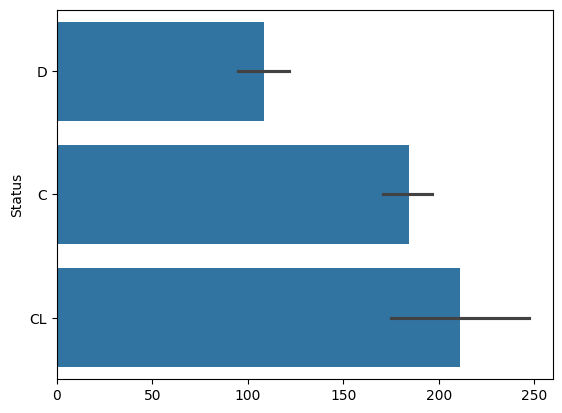

In [18]:
sns.barplot(data=df.Status);

In [19]:
df.groupby('Status').mean().T

Status,C,CL,D
N_Days,2457.583333,1508.210526,1475.640000
Drug,0.494048,0.526316,0.520000
Age,17758.922619,15039.421053,19446.544000
Sex,0.065476,0.157895,0.176000
Ascites,0.005952,0.000000,0.184000
Hepatomegaly,0.357143,0.631579,0.704000
Spiders,0.196429,0.263158,0.416000
Edema,0.071429,0.105263,0.440000
Bilirubin,1.503571,3.131579,5.630400
Cholesterol,326.539474,439.500000,415.754386


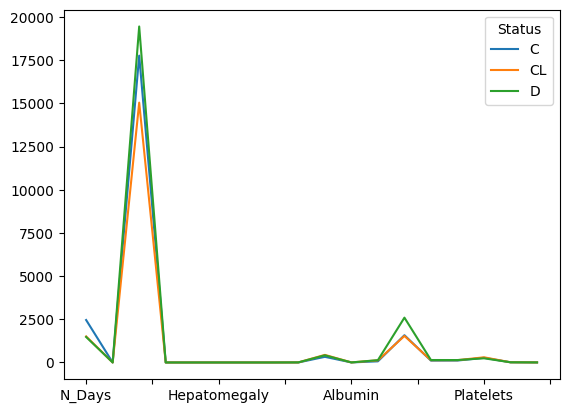

In [20]:
df.groupby('Status').mean().T.plot();

In [21]:
df.groupby('Status').median().T

Status,C,CL,D
N_Days,2309.50,1435.00,1191.00
Drug,0.00,1.00,1.00
Age,17756.00,14939.00,19295.00
Sex,0.00,0.00,0.00
Ascites,0.00,0.00,0.00
Hepatomegaly,0.00,1.00,1.00
Spiders,0.00,0.00,0.00
Edema,0.00,0.00,0.00
Bilirubin,0.90,3.20,3.20
Cholesterol,292.00,343.50,339.00


In [22]:
df.groupby('Status').mean().T

Status,C,CL,D
N_Days,2457.583333,1508.210526,1475.640000
Drug,0.494048,0.526316,0.520000
Age,17758.922619,15039.421053,19446.544000
Sex,0.065476,0.157895,0.176000
Ascites,0.005952,0.000000,0.184000
Hepatomegaly,0.357143,0.631579,0.704000
Spiders,0.196429,0.263158,0.416000
Edema,0.071429,0.105263,0.440000
Bilirubin,1.503571,3.131579,5.630400
Cholesterol,326.539474,439.500000,415.754386


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,312.0,2006.362179,1123.280843,41.00,1191.00,1839.50,2697.250,4556.00
Drug,312.0,0.506410,0.500762,0.00,0.00,1.00,1.000,1.00
Age,312.0,18269.442308,3864.805407,9598.00,15427.75,18187.50,20715.000,28650.00
Sex,312.0,0.115385,0.319999,0.00,0.00,0.00,0.000,1.00
Ascites,312.0,0.076923,0.266897,0.00,0.00,0.00,0.000,1.00
Hepatomegaly,312.0,0.512821,0.500639,0.00,0.00,1.00,1.000,1.00
Spiders,312.0,0.288462,0.453775,0.00,0.00,0.00,1.000,1.00
Edema,312.0,0.221154,0.549014,0.00,0.00,0.00,0.000,2.00
Bilirubin,312.0,3.256090,4.530315,0.30,0.80,1.35,3.425,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.50,309.50,400.000,1775.00


In [24]:
df[df['Cholesterol'].isna()].groupby('Status').size()

Status
C     16
CL     1
D     11
dtype: int64

In [25]:
#  поменять потом на более красивое решение с DRY
df['Cholesterol'] = df['Cholesterol'].fillna(
    df['Status'].apply(lambda x: 415.754386 if x == 'D' else (326.539474 if x == 'C' else 439.500000))
)
df['Copper'] = df['Copper'].fillna(
    df['Status'].apply(lambda x: 135.411290 if x == 'D' else (66.610778 if x == 'C' else 124.000000))
)
df['Tryglicerides'] = df['Tryglicerides'].fillna(
    df['Status'].apply(lambda x: 140.486726 if x == 'D' else (111.788079 if x == 'C' else 133.944444))
)
df['Platelets'] = df['Platelets'].fillna(
    df['Status'].apply(lambda x: 242.137097 if x == 'D' else (272.563636 if x == 'C' else 298.842105))
)

In [26]:
df.Cholesterol = df.Cholesterol.round(0).astype('int64')
df.Copper = df.Copper.round(0).astype('int64')
df.Alk_Phos = df.Alk_Phos.round(0).astype('int64')
df.SGOT = df.SGOT.round(0).astype('int64')
df.Tryglicerides = df.Tryglicerides.round(0).astype('int64')
df.Platelets = df.Platelets.round(0).astype('int64')
df.Stage = df.Stage.round(0).astype('int64')
df.Age = (df.Age/365.25).astype('int64')
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,1,58,0,1,1,1,2,14.5,261,2.60,156,1718,138,172,190,12.2,4
1,4500,C,1,56,0,0,1,1,0,1.1,302,4.14,54,7395,114,88,221,10.6,3
2,1012,D,1,70,1,0,0,0,1,1.4,176,3.48,210,516,96,55,151,12.0,4
3,1925,D,1,54,0,0,1,1,1,1.8,244,2.54,64,6122,61,92,183,10.3,4
4,1504,CL,0,38,0,0,1,1,0,3.4,279,3.53,143,671,113,72,136,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,1,61,0,0,1,0,0,0.4,246,3.58,24,797,91,113,288,10.4,2
308,994,C,0,58,0,0,0,0,0,0.4,260,2.75,41,1166,70,82,231,10.8,2
309,939,C,1,62,0,0,0,0,0,1.7,434,3.35,39,1713,171,100,234,10.2,2
310,839,C,1,37,0,0,0,0,0,2.0,247,3.16,69,1050,117,88,335,10.5,2


In [27]:
df.dtypes

N_Days             int64
Status            object
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Edema              int64
Bilirubin        float64
Cholesterol        int64
Albumin          float64
Copper             int64
Alk_Phos           int64
SGOT               int64
Tryglicerides      int64
Platelets          int64
Prothrombin      float64
Stage              int64
dtype: object

In [28]:
pd.DataFrame(df.isnull().sum(), 
            columns = ['missing_count']) \
.assign(missing_pct = lambda x: x['missing_count']/df.shape[0]*100).astype(float).round(1)

,missing_count,missing_pct
N_Days,0.0,0.0
Status,0.0,0.0
Drug,0.0,0.0
Age,0.0,0.0
Sex,0.0,0.0
Ascites,0.0,0.0
Hepatomegaly,0.0,0.0
Spiders,0.0,0.0
Edema,0.0,0.0
Bilirubin,0.0,0.0


In [29]:
any_match = df[df.isin(['NaN']).any(axis=1)]
print(any_match)

Empty DataFrame
Columns: [N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []


In [30]:
df.groupby('Status').mean().T

Status,C,CL,D
N_Days,2457.583333,1508.210526,1475.64000
Drug,0.494048,0.526316,0.52000
Age,48.107143,40.684211,52.69600
Sex,0.065476,0.157895,0.17600
Ascites,0.005952,0.000000,0.18400
Hepatomegaly,0.357143,0.631579,0.70400
Spiders,0.196429,0.263158,0.41600
Edema,0.071429,0.105263,0.44000
Bilirubin,1.503571,3.131579,5.63040
Cholesterol,326.583333,439.526316,415.77600


In [31]:
df_corr = df

In [32]:
df_corr['Status'] = df_corr['Status'].apply(lambda x: 0 if x == 'D' else (1 if x == 'C' else 2))
df_corr = df_corr.corr()

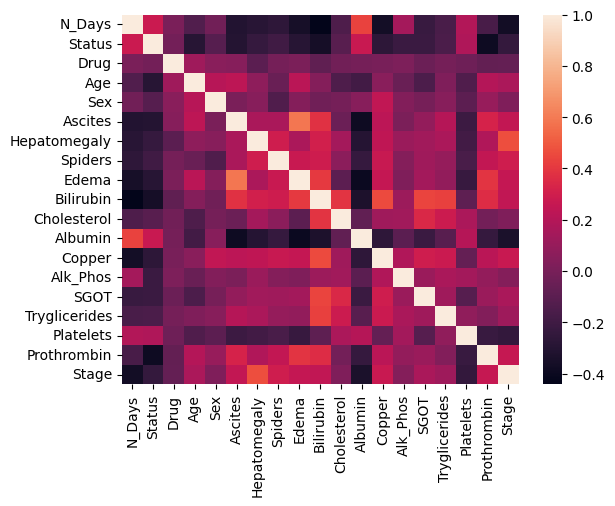

In [33]:
sns.heatmap(data=df_corr);

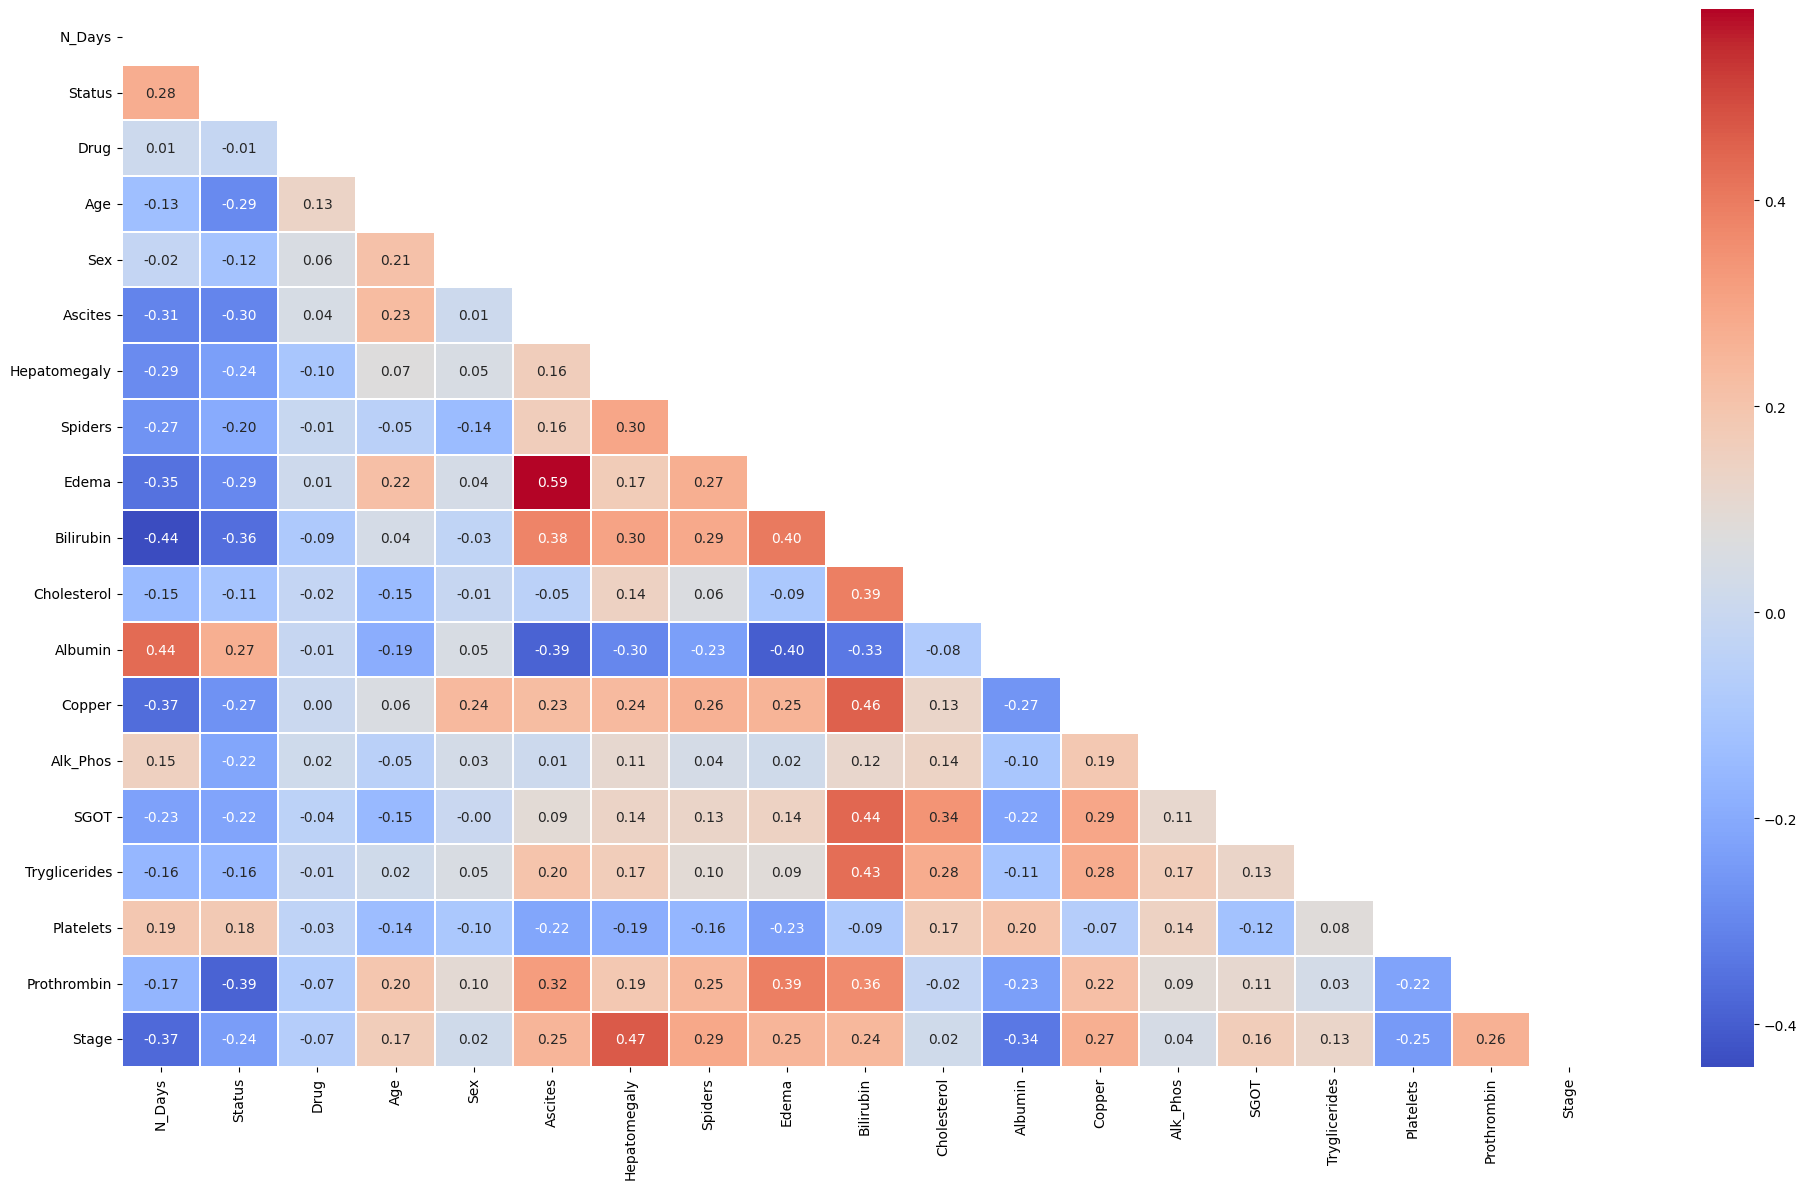

In [34]:
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, linewidths=0.1, annot=True, fmt = ".2f", cmap = 'coolwarm', mask = np.triu(np.ones_like(df_corr, dtype=bool)))
plt.tight_layout()
plt.show()

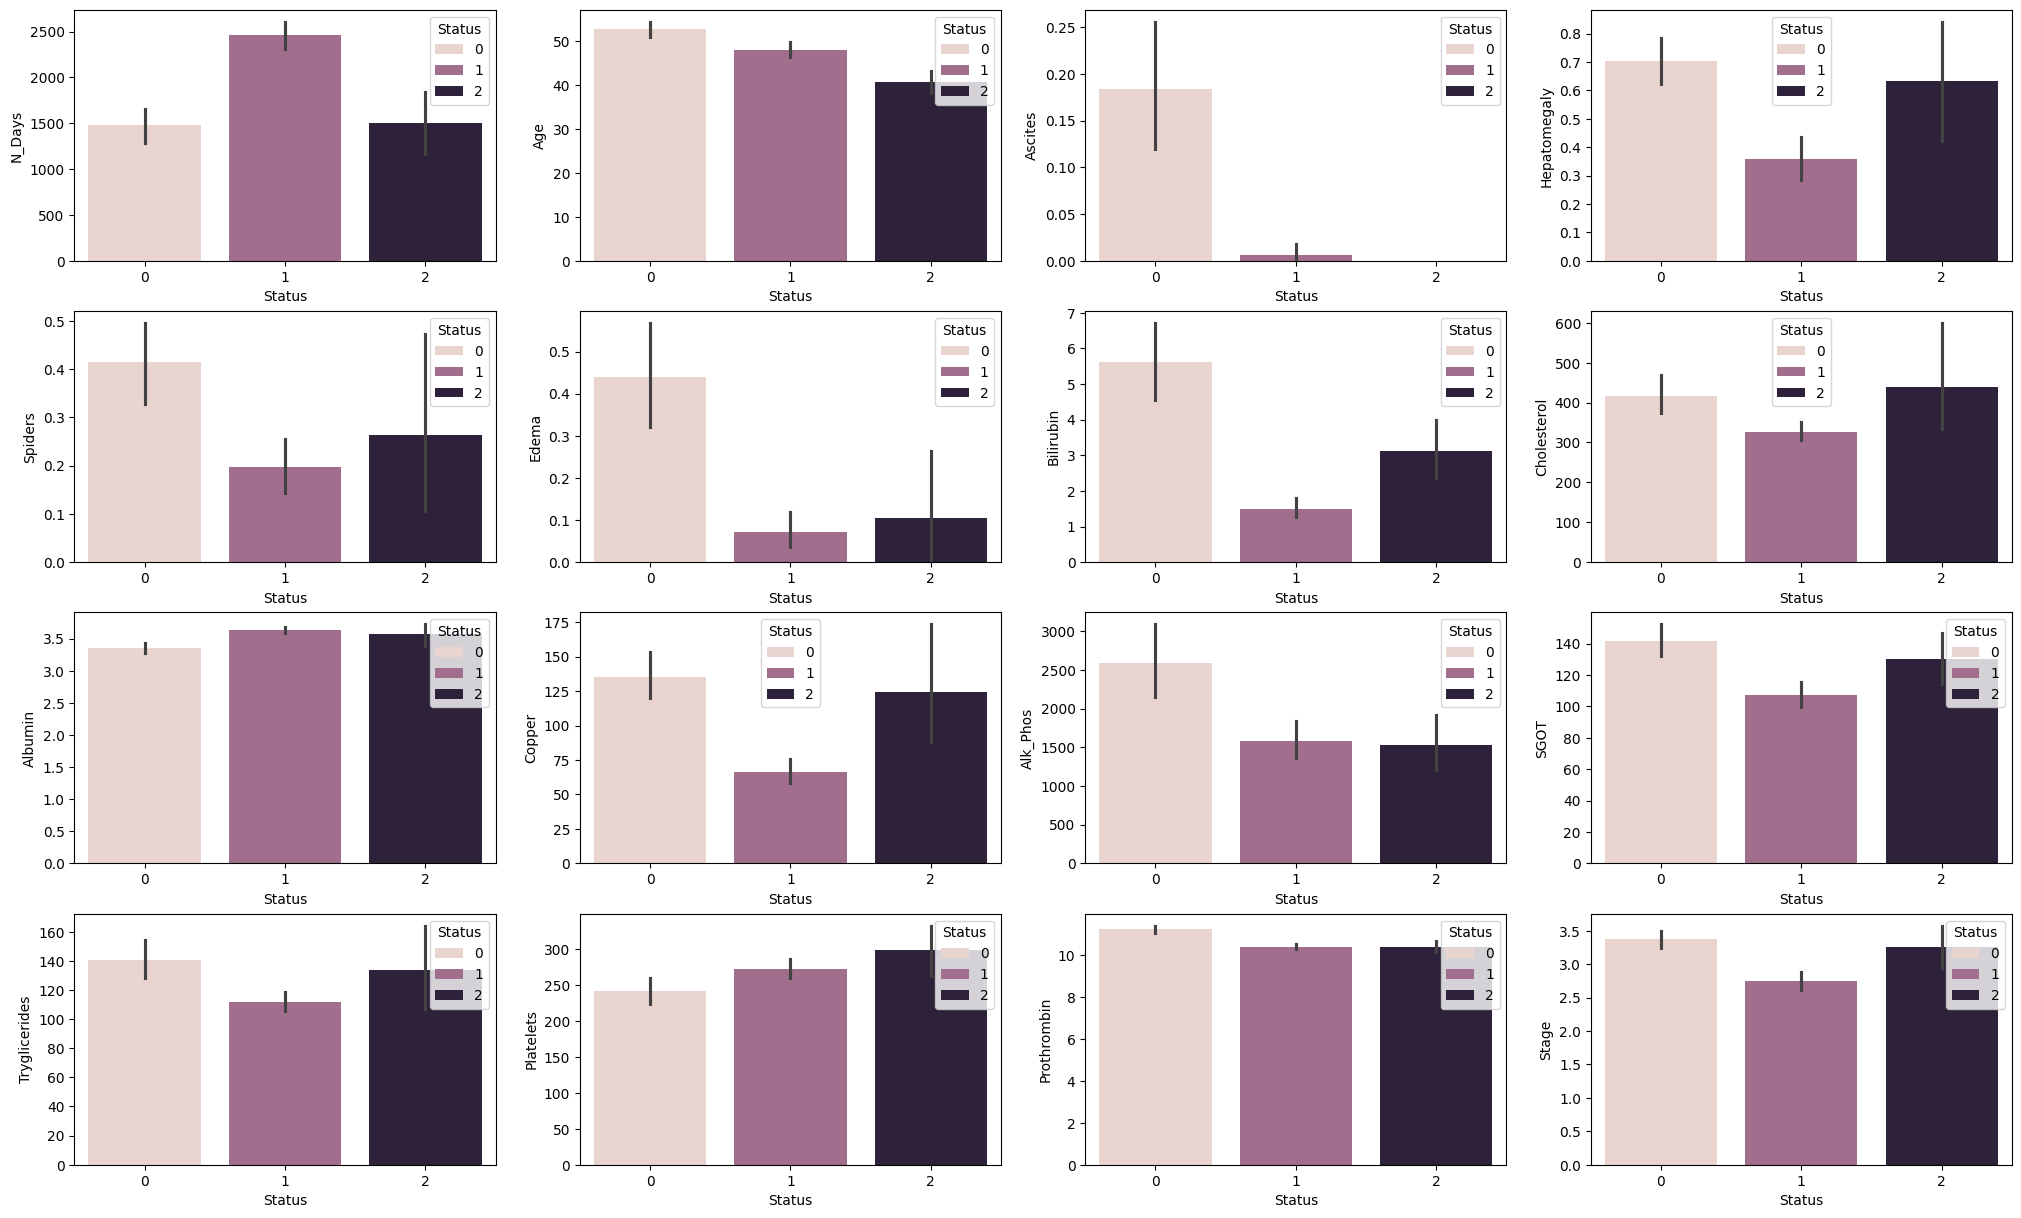

In [35]:
fig, axs = plt.subplots(4, 4, figsize=(25, 15))

columns = ['N_Days','Age', 'Ascites', 'Hepatomegaly', 
           'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 
           'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 
           'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    sns.barplot(data=df, x='Status', y=col, hue='Status',ax=axs[row, col_idx])

plt.show()

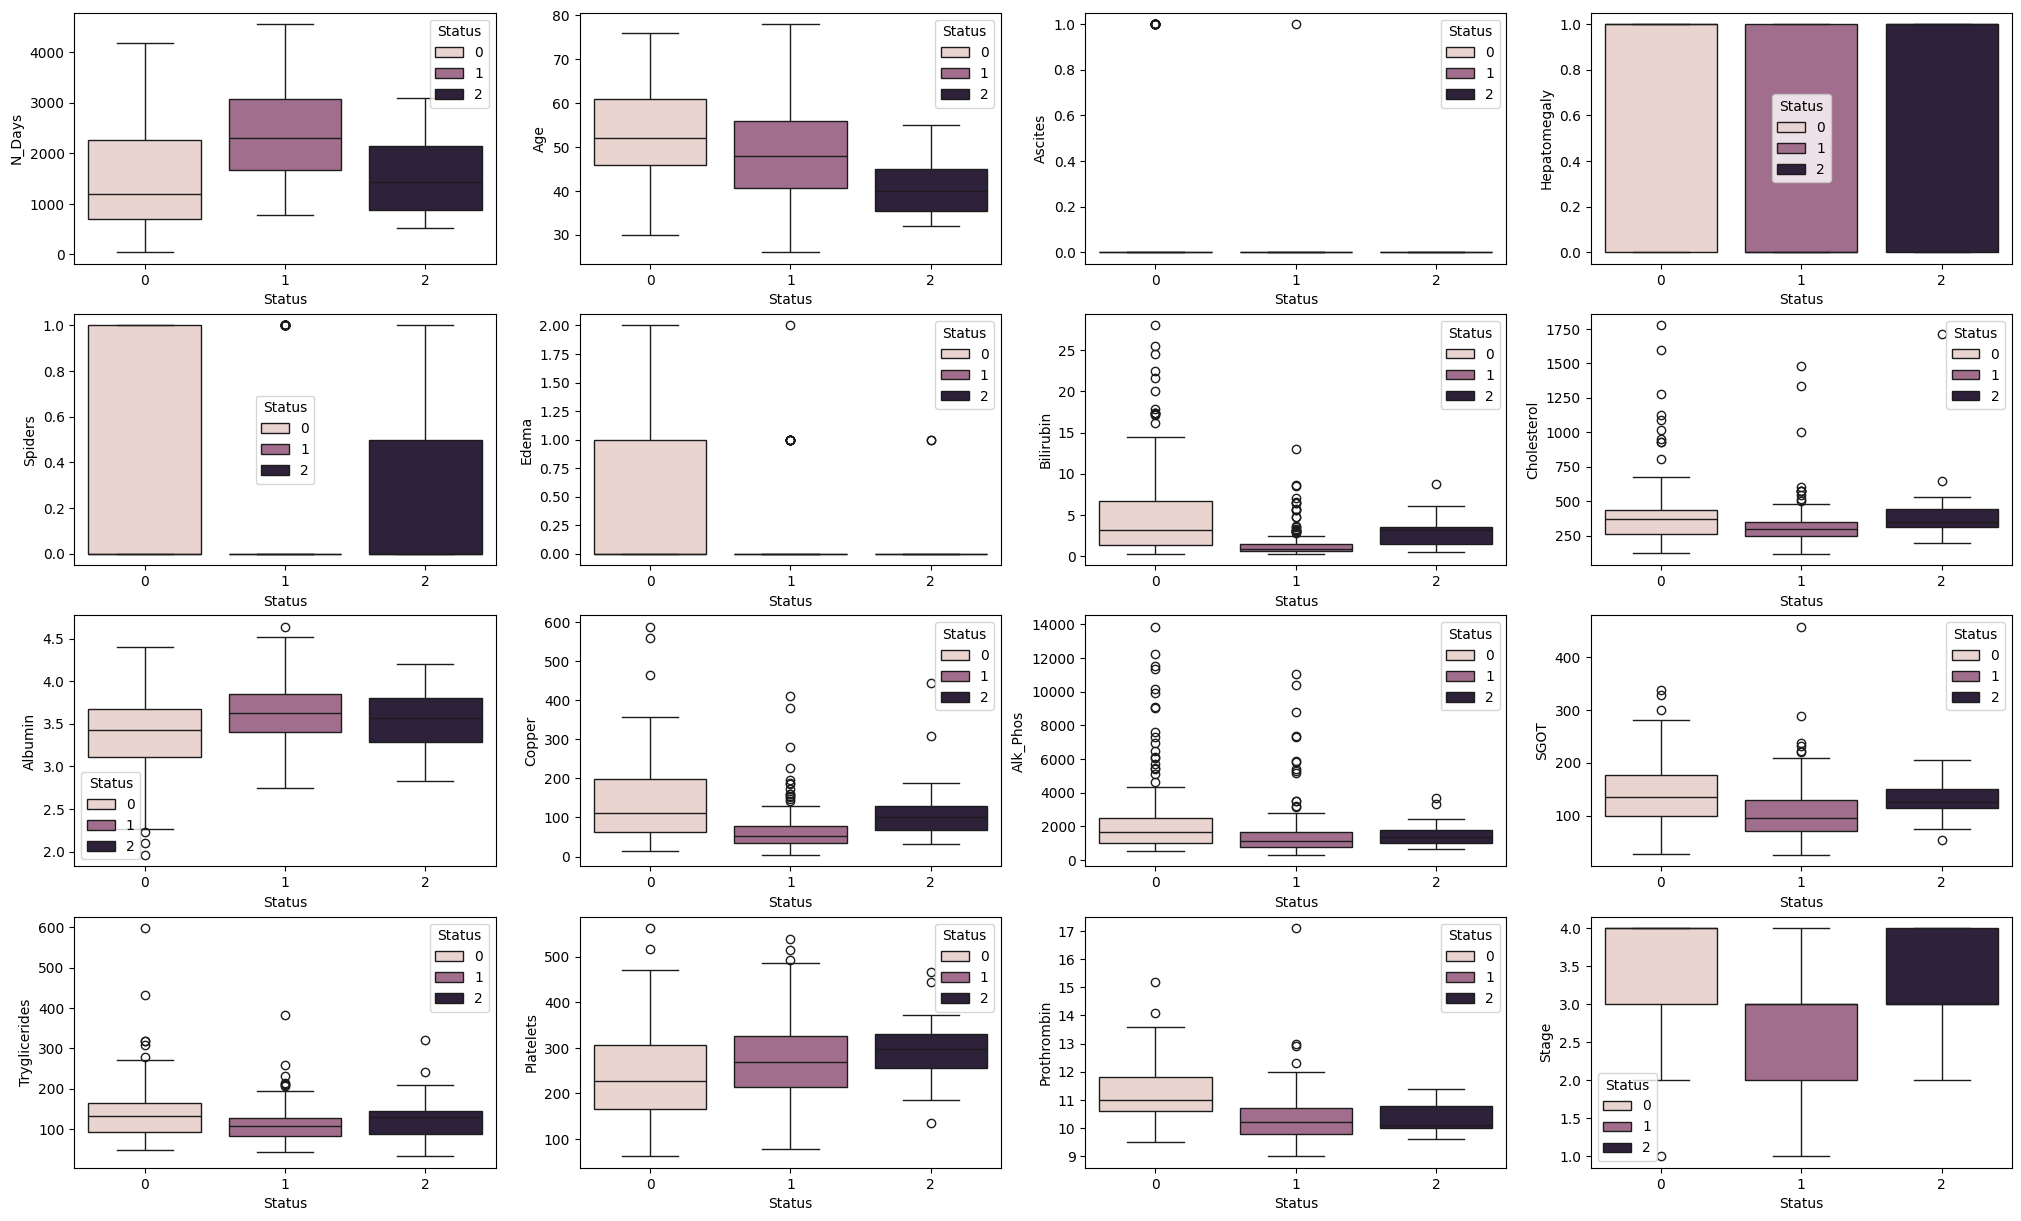

In [36]:
fig, axs = plt.subplots(4, 4, figsize=(25, 15))

columns = ['N_Days','Age', 'Ascites', 'Hepatomegaly', 
           'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 
           'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 
           'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    sns.boxplot(data=df, x='Status', y=col, hue='Status',ax=axs[row, col_idx])

plt.show()

In [37]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,1,58,0,1,1,1,2,14.5,261,2.60,156,1718,138,172,190,12.2,4
1,4500,1,1,56,0,0,1,1,0,1.1,302,4.14,54,7395,114,88,221,10.6,3
2,1012,0,1,70,1,0,0,0,1,1.4,176,3.48,210,516,96,55,151,12.0,4
3,1925,0,1,54,0,0,1,1,1,1.8,244,2.54,64,6122,61,92,183,10.3,4
4,1504,2,0,38,0,0,1,1,0,3.4,279,3.53,143,671,113,72,136,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,1,1,61,0,0,1,0,0,0.4,246,3.58,24,797,91,113,288,10.4,2
308,994,1,0,58,0,0,0,0,0,0.4,260,2.75,41,1166,70,82,231,10.8,2
309,939,1,1,62,0,0,0,0,0,1.7,434,3.35,39,1713,171,100,234,10.2,2
310,839,1,1,37,0,0,0,0,0,2.0,247,3.16,69,1050,117,88,335,10.5,2


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Status'], axis=1), df['Status'], test_size=0.3, random_state=52, stratify=df['Status']
)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((218, 18), (94, 18), (218,), (94,))

In [40]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
preds = linreg.predict(X_test_scaled)

In [42]:
mean_absolute_error(preds, y_test)
mean_squared_error(preds, y_test)

0.26353990631104285

In [43]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_scaled, y_train)
preds = logreg.predict(X_test_scaled)

In [44]:
from sklearn.preprocessing import label_binarize

In [45]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted')
recall = recall_score(y_test, preds, average='weighted')
f1 = f1_score(y_test, preds, average='weighted')
print("Accuracy:    {:.3f}\nPrecision:    {:.3f}\nRecal:    {:.3f}\nF1-Score:    {:.3f}".format(accuracy, precision, recall, f1))

Accuracy:    0.766
Precision:    0.763
Recal:    0.766
F1-Score:    0.752


In [46]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

In [47]:
auc = roc_auc_score(preds, y_test_binarized, average='weighted', multi_class='ovr')
print("ROC-AUC:", auc)

ROC-AUC: 0.8018304159608509


In [48]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        38
           1       0.74      0.90      0.81        50
           2       0.50      0.17      0.25         6

    accuracy                           0.77        94
   macro avg       0.69      0.58      0.60        94
weighted avg       0.76      0.77      0.75        94



In [49]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
import os
import graphviz
import pydotplus

os.environ["PATH"] += os.pathsep + '/usr/local/bin/'

def plot_tree(model, cols, fname='temp_tree.png'):
    dot_data = export_graphviz(model, filled=True, rounded=True, feature_names=cols, out_file=None)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.write_png(fname)
    img = plt.imread(fname)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [50]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, criterion='gini')
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.45      0.52        38
           1       0.69      0.84      0.76        50
           2       0.00      0.00      0.00         6

    accuracy                           0.63        94
   macro avg       0.44      0.43      0.43        94
weighted avg       0.62      0.63      0.61        94



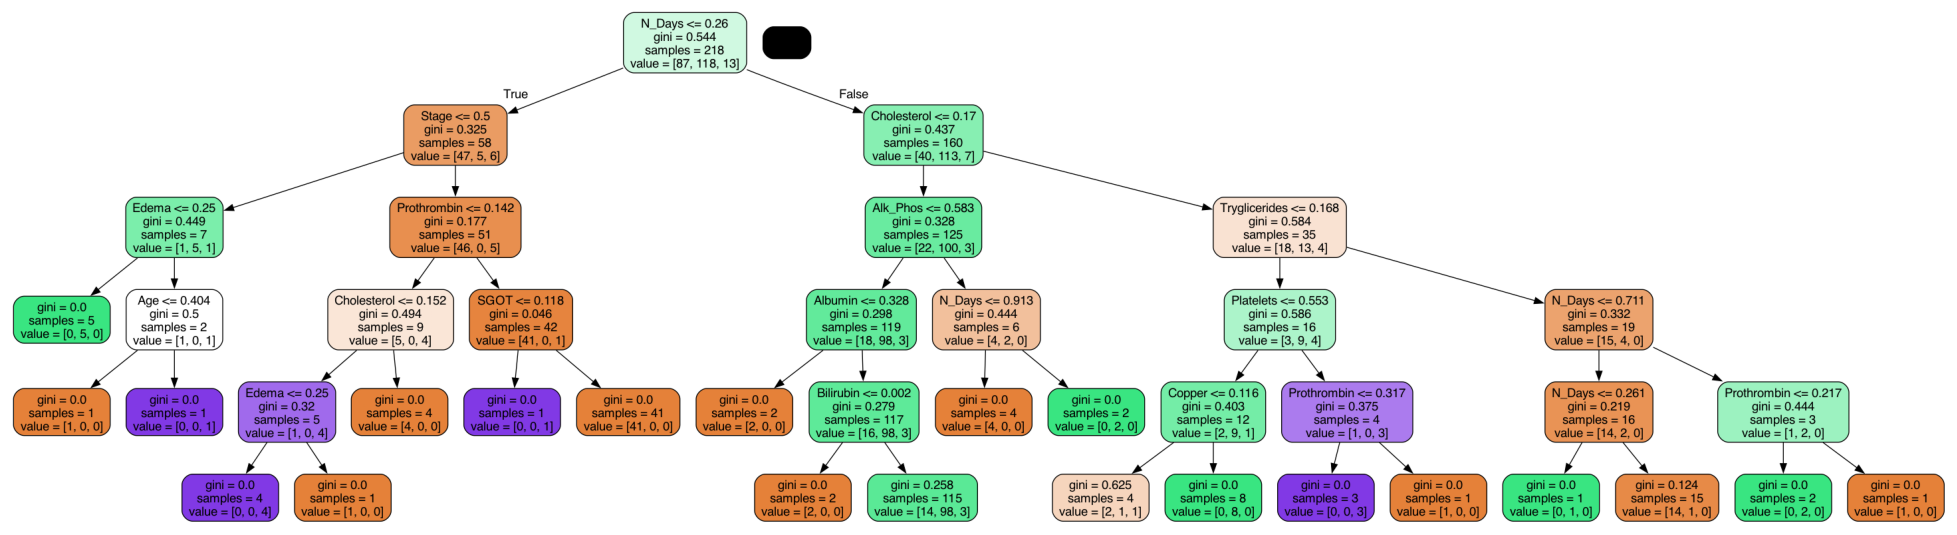

              precision    recall  f1-score   support

           0       0.63      0.45      0.52        38
           1       0.69      0.84      0.76        50
           2       0.00      0.00      0.00         6

    accuracy                           0.63        94
   macro avg       0.44      0.43      0.43        94
weighted avg       0.62      0.63      0.61        94



In [51]:
plt.figure(figsize=(25, 25))
plt.axis('off')
plot_tree(clf, df.columns[df.columns != 'Status'])
print(classification_report(y_test, pred))

In [52]:
clf.feature_importances_

array([0.4217723 , 0.        , 0.01182564, 0.        , 0.        ,
       0.        , 0.        , 0.04426168, 0.03482917, 0.13266952,
       0.03365844, 0.02759316, 0.03421791, 0.02308816, 0.05636518,
       0.03596966, 0.06452207, 0.07922711])

In [53]:
pd.DataFrame(clf.feature_importances_, index = list(df.columns[df.columns != 'Status']), columns = ['feature importance']).sort_values('feature importance', ascending = False)

,feature importance
N_Days,0.421772
Cholesterol,0.132670
Stage,0.079227
Prothrombin,0.064522
Tryglicerides,0.056365
Edema,0.044262
Platelets,0.035970
Bilirubin,0.034829
Alk_Phos,0.034218
Albumin,0.033658


In [54]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled)
knn_probs = knn.predict_proba(X_test_scaled)

In [55]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.70      1.00      0.83        50
           2       0.00      0.00      0.00         6

    accuracy                           0.77        94
   macro avg       0.55      0.53      0.52        94
weighted avg       0.76      0.77      0.73        94



In [56]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted', zero_division=np.nan)
recall = recall_score(y_test, preds, average='weighted')
f1 = f1_score(y_test, preds, average='weighted')
print("Accuracy:    {:.3f}\nPrecision:    {:.3f}\nRecal:    {:.3f}\nF1-Score:    {:.3f}".format(accuracy, precision, recall, f1))

Accuracy:    0.766
Precision:    0.813
Recal:    0.766
F1-Score:    0.731


In [57]:
knn_auc = roc_auc_score(y_test, knn_probs, average='weighted', multi_class='ovr')
print("ROC-AUC:", knn_auc)

ROC-AUC: 0.8536974993092016


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

In [59]:
classes = le.classes_

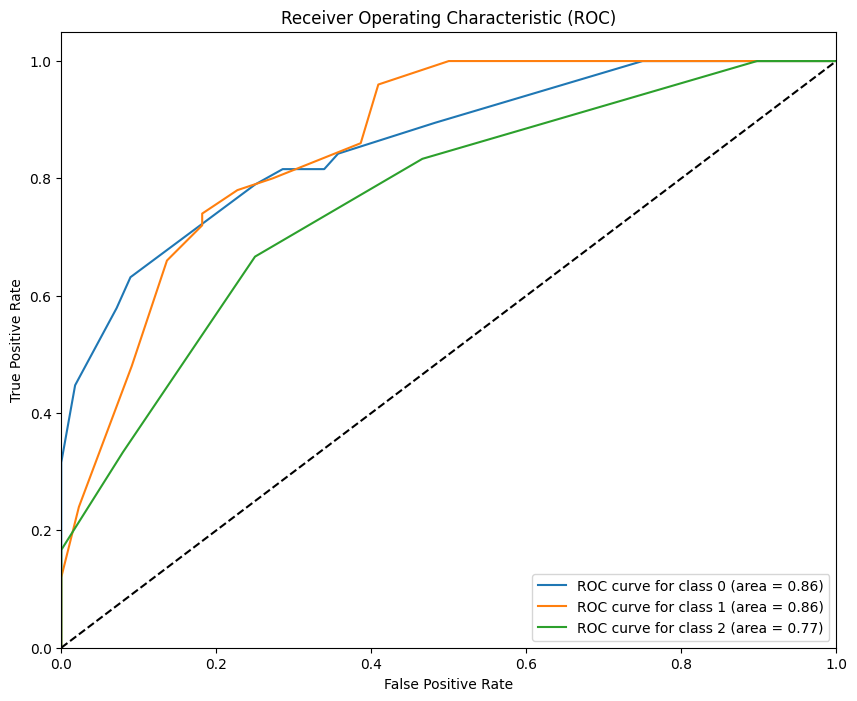

In [63]:
# Построение ROC-кривой для каждого класса
plt.figure(figsize=(10, 8))

for i, class_name in enumerate(classes):
    # Вычисление ROC-кривой
    fpr, tpr, _ = roc_curve(y_test == i, knn_probs[:, i])
    roc_auc_value = auc(fpr, tpr)
    
    # Построение ROC-кривой
    plt.plot(fpr, tpr, label=f'ROC curve for class {class_name} (area = {roc_auc_value:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

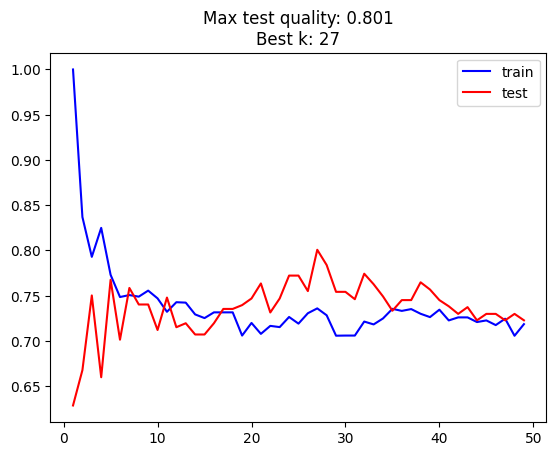

In [61]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train, average='weighted'))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test, average='weighted'))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();